# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [2]:
apple = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv")
apple.head(4)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48


### Step 4.  Check out the type of the columns

In [3]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
Date         8465 non-null object
Open         8465 non-null float64
High         8465 non-null float64
Low          8465 non-null float64
Close        8465 non-null float64
Volume       8465 non-null int64
Adj Close    8465 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.0+ KB


### Step 5. Transform the Date column as a datetime type

In [4]:
apple['Date'] = pd.to_datetime(apple.Date)
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
Date         8465 non-null datetime64[ns]
Open         8465 non-null float64
High         8465 non-null float64
Low          8465 non-null float64
Close        8465 non-null float64
Volume       8465 non-null int64
Adj Close    8465 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.0 KB


### Step 6.  Set the date as the index

In [5]:
apple = apple.set_index('Date')
apple.head(3)
# make sure to put changes into the dataframe!!!

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 7.  Is there any duplicate dates?

In [6]:
print(apple.index.isnull().sum())
print(apple.Open.isnull().sum())

0
0


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [7]:
apple = apple.sort_values(by='Date')
apple.head(3)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### Step 9. Get the last business day of each month

In [8]:
import calendar

def last_day_of_month(date):
    return calendar.monthrange(date.year, date.month)[1]

# same = lambda date: calendar.monthrange(date.year, date.month)[1]

apple.index.to_series().apply(last_day_of_month).head(3)

Date
1980-12-12    31
1980-12-15    31
1980-12-16    31
Name: Date, dtype: int64

### Step 10.  What is the difference in days between the first day and the oldest

In [9]:
(apple.index.max()-apple.index.min()).days

12261

### Step 11.  How many months in the data we have?

In [10]:
apple.index.max().to_period('M') - apple.index.min().to_period('M')


403

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

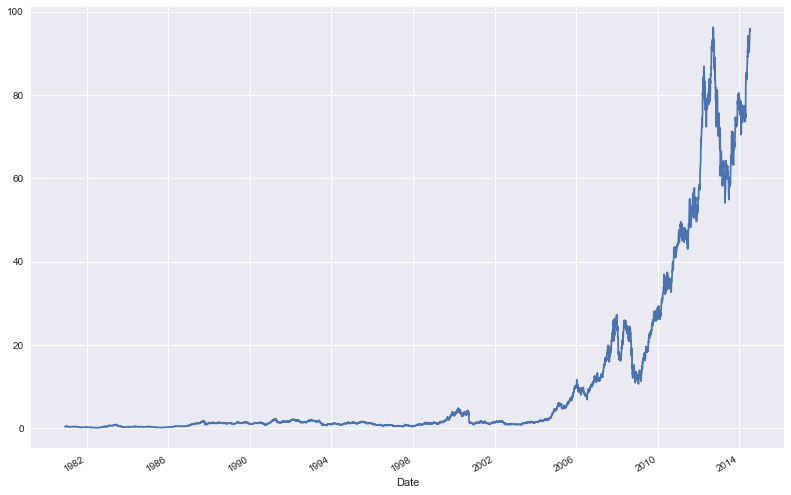

In [11]:
apple['Adj Close'].plot(figsize=(13.5,9));

### BONUS: Create your own question and answer it.

In [ ]:
# In the below cells I will try out the ARIMA tutorial from 
# https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
# rolling statistics plots along with Dickey-Fuller test results
# if mean is increasing with time then it is not a stationary series
# If the ‘Test Statistic’ is less than the ‘Critical Value’, 
    # we can reject the null hypothesis and say that the series is stationary
# the signed values should be compared and not the absolute values

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [14]:
apple = apple.rename(columns={'Adj Close': 'Adjclose'})
apple.head()

,Open,High,Low,Close,Volume,Adjclose
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


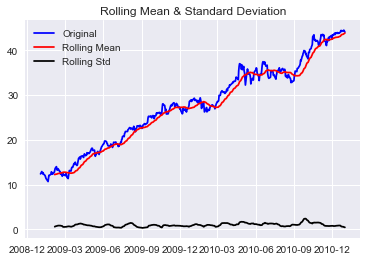

Results of Dickey-Fuller Test:
Test Statistic                  -0.441993
p-value                          0.902848
#Lags Used                       0.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64


In [15]:
# stationarity test: check if rolling values have a trend (going up etc)
test_stationarity(apple.Adjclose[(apple.index > '2009-1-1') & (apple.index <= '2011-1-1')])


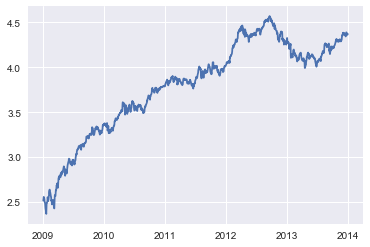

In [16]:
# Can reduce trend by using transformations 
# if there is a significant positive trend, can apply transformation which penalize higher values more than smaller values
# These can be taking a log, square root, cube root, etc. 
# Here let's do a log transform for simplicity

apple1 = apple[(apple.index > '2009-1-1') & (apple.index <= '2014-1-1')]

apple_log = np.log(apple1.Adjclose)
plt.plot(apple_log);

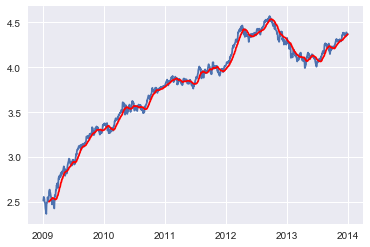

In [17]:
# Moving average = take average of ‘k’ consecutive values depending on the frequency of time series
# Took average for two years (24 months)

moving_avg = apple_log.rolling(24).mean()
plt.plot(apple_log)
plt.plot(moving_avg, color='red')

In [18]:
apple_log_moving_avg_diff = apple_log - moving_avg
apple_log_moving_avg_diff.head(24)

# since we are taking average of last 24 values, rolling mean is not defined for first 23 values

Date
2009-01-02         NaN
2009-01-05         NaN
2009-01-06         NaN
2009-01-07         NaN
2009-01-08         NaN
2009-01-09         NaN
2009-01-12         NaN
2009-01-13         NaN
2009-01-14         NaN
2009-01-15         NaN
2009-01-16         NaN
2009-01-20         NaN
2009-01-21         NaN
2009-01-22         NaN
2009-01-23         NaN
2009-01-26         NaN
2009-01-27         NaN
2009-01-28         NaN
2009-01-29         NaN
2009-01-30         NaN
2009-02-02         NaN
2009-02-03         NaN
2009-02-04         NaN
2009-02-05    0.074994
Name: Adjclose, dtype: float64

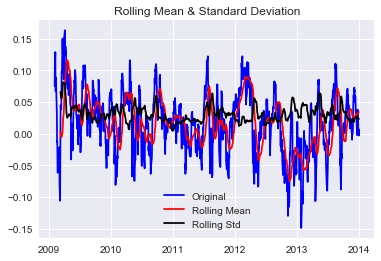

Results of Dickey-Fuller Test:
Test Statistic                -7.225105e+00
p-value                        2.062833e-10
#Lags Used                     4.000000e+00
Number of Observations Used    1.230000e+03
Critical Value (1%)           -3.435678e+00
Critical Value (5%)           -2.863893e+00
Critical Value (10%)          -2.568023e+00
dtype: float64


In [19]:
# drop NaN values
# check the plots to test stationarity
# stationarity test: check if rolling values have a trend (going up etc)

apple_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(apple_log_moving_avg_diff);


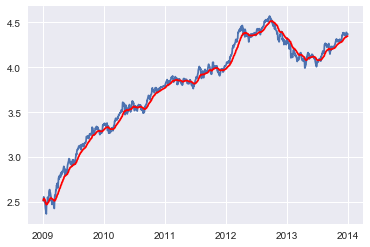

In [20]:
# For forecasting complex situations ex. stock price, 
    # moving avg not good enough because time series would need to be strictly defined
# take a ‘weighted moving average’ where more recent values are given a higher weight

expwighted_avg = apple_log.ewm(halflife=12).mean()
plt.plot(apple_log)
plt.plot(expwighted_avg, color='red')

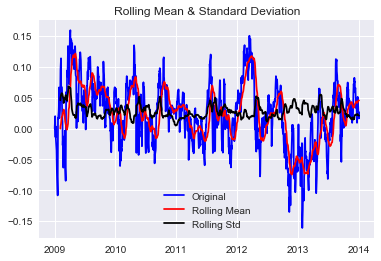

Results of Dickey-Fuller Test:
Test Statistic                   -4.910343
p-value                           0.000033
#Lags Used                       11.000000
Number of Observations Used    1246.000000
Critical Value (1%)              -3.435609
Critical Value (5%)              -2.863862
Critical Value (10%)             -2.568006
dtype: float64


In [21]:
# parameter ‘halflife’ is used to define the amount of exponential decay
# remove decay from series and check stationarity
# stationarity test: check if rolling values have a trend (going up etc)

apple_log_ewma_diff = apple_log - expwighted_avg
test_stationarity(apple_log_ewma_diff)

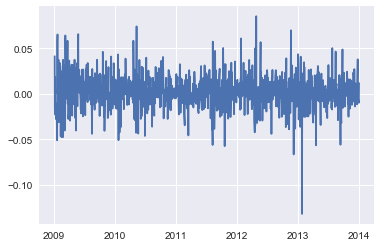

In [22]:
# differencing is one of the most common methods of dealing with both trend and seasonality 
# take the difference of the observation at a particular instant with that at the previous instant

apple_log_diff = apple_log - apple_log.shift()
plt.plot(apple_log_diff);


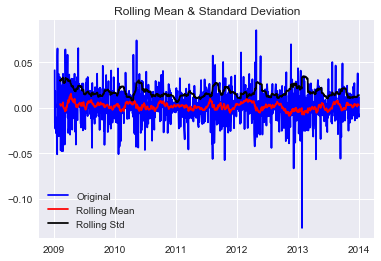

Results of Dickey-Fuller Test:
Test Statistic                -1.206547e+01
p-value                        2.414413e-22
#Lags Used                     1.000000e+01
Number of Observations Used    1.246000e+03
Critical Value (1%)           -3.435609e+00
Critical Value (5%)           -2.863862e+00
Critical Value (10%)          -2.568006e+00
dtype: float64


In [23]:
# stationarity test: check if rolling values have a trend (going up etc)

apple_log_diff.dropna(inplace=True)
test_stationarity(apple_log_diff)

In [24]:
# ARIMA stands for Auto-Regressive Integrated Moving Averages
# The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation
# The predictors depend on the parameters (p,d,q) of the ARIMA model
# Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable
# Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation
# Number of Differences (d): number of nonseasonal differences

# To determine the value of ‘p’ and ‘q’
    # Autocorrelation Function (ACF): 
        # a measure of the correlation between the the TS with a lagged version of itself
    # Partial Autocorrelation Function (PACF)
        # measures the correlation between the TS with a lagged version of itself but after eliminating the variations

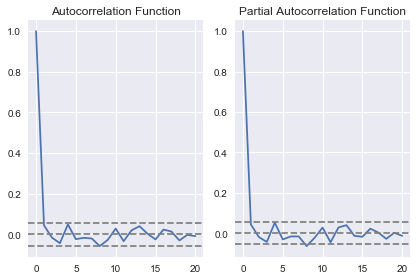

In [25]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(apple_log_diff, nlags=20)
lag_pacf = pacf(apple_log_diff, nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(apple_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(apple_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(apple_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(apple_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# p – The lag value where the PACF chart crosses the upper confidence interval for the first time
# q – The lag value where the ACF chart crosses the upper confidence interval for the first time

In [26]:
from statsmodels.tsa.arima_model import ARIMA

/Users/jinny/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jinny/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


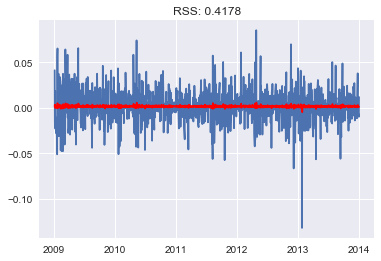

In [27]:
model = ARIMA(apple_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(apple_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-apple_log_diff)**2));

/Users/jinny/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jinny/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5,1,'RSS: 0.4179')

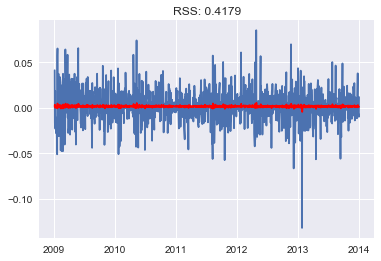

In [28]:
model = ARIMA(apple_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(apple_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-apple_log_diff)**2))


/Users/jinny/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jinny/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5,1,'RSS: 0.4174')

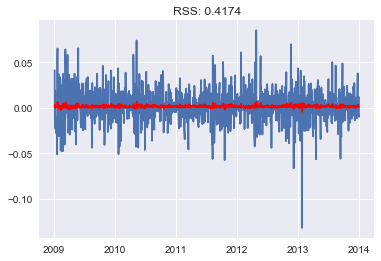

In [41]:
model = ARIMA(apple_log, order=(2, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(apple_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-apple_log_diff)**2))

# If SVD did not converge error - check pqd values in argument
# Fiddled with order 1,1,1 and default 2,1,2 but other combinations resulted in SVD error...

In [45]:
# date from apple log (apple.index > '2009-1-1') & (apple.index <= '2014-1-1')

predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())


Date
2009-01-05    0.001481
2009-01-06    0.003227
2009-01-07   -0.000153
2009-01-08    0.000122
2009-01-09    0.002418
dtype: float64


In [47]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2009-01-05    0.001481
2009-01-06    0.004707
2009-01-07    0.004554
2009-01-08    0.004676
2009-01-09    0.007094
dtype: float64


In [57]:
predictions_ARIMA_log = pd.Series(apple_log[0], index=apple_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()


Date
2009-01-02    2.516890
2009-01-05    2.518370
2009-01-06    2.521597
2009-01-07    2.521444
2009-01-08    2.521566
dtype: float64

In [64]:
print(predictions_ARIMA.isnull().sum())
print(apple.Adjclose.isnull().sum())
print(len(predictions_ARIMA))
print(len(apple.Adjclose))

0
0
1258
8465


Text(0.5,1,'RMSE: 19.8815')

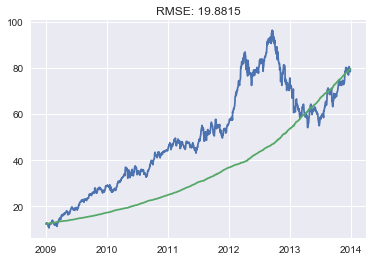

In [66]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(apple.Adjclose[(apple.index > '2009-1-1') & (apple.index <= '2014-1-1')])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-apple.Adjclose[(apple.index > '2009-1-1') & (apple.index <= '2014-1-1')])**2)/len(apple.Adjclose[(apple.index > '2009-1-1') & (apple.index <= '2014-1-1')])))